<a href="https://colab.research.google.com/github/julopezrio/TAM/blob/main/tarea_0.25_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
#función cálculo varianza del ruido a partir del snr dB
def var_snr(x,snrdB): #x vector de datos (señal), snrdB SNR en dB
    Px = np.mean(x**2)#estimador potencia media de la señal
    return Px/(10**(snrdB/10))

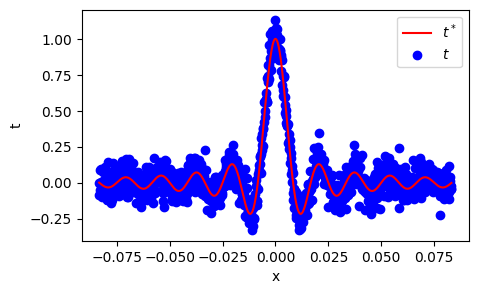

In [54]:
#datos simulados
Fo = 60 #frecuencia fundamental señal cos
A = 1 # amplitud de la señal
To = 1/Fo #periodo fundamental
Fs = 100*Fo #frecuencia muestreo según nyquist Fs >= 2 Fo
X = np.arange(-5*To,5*To,1/Fs) #vector de entrada en un periodo con pasos según período de muestreo

snrdB = 10 #ruido según SNR dB

#señal limpia - objetivo
# Use sinc function instead of sin function
tt = A*np.sinc(2*Fo*X)

#modelo con función sinc contaminada con ruido Gaussiano
# Use sinc function instead of sin function
t = A*np.sinc(2*Fo*X) + np.sqrt(var_snr(tt,snrdB))*np.random.randn(len(X))


X = X.reshape(-1,1)#filas = realizaciones-muestras
t = t.reshape(-1,1)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.82534e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.08088e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.85908e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.42198e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.33344e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/pytho

Mejores hiperparámetros: {'poly__degree': 30, 'ridge__alpha': 1e-08}
MSE Test: 0.011872751034844947
R2 Test: 0.8179108417989953


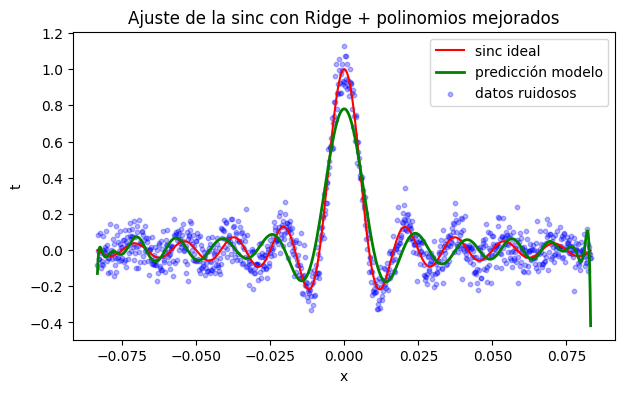

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline

X = X.reshape(-1, 1)
t = t.reshape(-1, 1)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, t, test_size=0.3, random_state=0, shuffle=True
)

# -------------------------
# Pipeline con escalado + polinomio + Ridge
# -------------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),        # Normalización
    ("poly", PolynomialFeatures(include_bias=False)),
    ("ridge", Ridge())
])

# Grid de búsqueda ampliado
param_grid = {
    "poly__degree": [5, 10, 15, 20, 25, 30],
    "ridge__alpha": [1e-8, 1e-6, 1e-4, 1e-2, 1, 10]
}

cv = KFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train.ravel())

print("Mejores hiperparámetros:", grid.best_params_)

best_model = grid.best_estimator_

# Evaluación
y_pred = best_model.predict(X_test)
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("R2 Test:", r2_score(y_test, y_pred))

# -------------------------
# Visualizar ajuste
# -------------------------
X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1,1)
y_true_plot = A * np.sinc(2 * Fo * X_plot.flatten())
y_pred_plot = best_model.predict(X_plot)

plt.figure(figsize=(7,4))
plt.plot(X_plot, y_true_plot, 'r', label='sinc ideal')
plt.plot(X_plot, y_pred_plot, 'g', linewidth=2, label='predicción modelo')
plt.scatter(X, t, c='b', s=10, alpha=0.3, label='datos ruidosos')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Ajuste de la sinc con Ridge + polinomios mejorados')
plt.show()
